# Summer 2022 Data Science Intern Challenge

Notebook by: Jordan Lau

## Question 1
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

In [17]:
df = pd.read_csv('data/shopify_orders.csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36
1,2,92,925,90,1,cash,2017-03-03 17:38
2,3,44,861,144,1,cash,2017-03-14 4:23
3,4,18,935,156,1,credit_card,2017-03-26 12:43
4,5,18,883,156,1,credit_card,2017-03-01 4:35


First, let's confirm that we can obtain the same values stated in the question. It looks like the 30 day window is for the month of March 2017. We can confirm that the AOV is calculated by taking the mean of the `order_amount`

In [18]:
print(f' Start date: {df["created_at"].min()}')
print(f' End date: {df["created_at"].max()}')

 Start date: 2017-03-01 0:08
 End date: 2017-03-30 9:55


In [19]:
print(f' AOV: ${df["order_amount"].mean().round(2)}')

 AOV: $3145.13


<br>

### a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

As we are using the mean to calculate our statistic, it can be influenced by outlier orders that have a large value. AOV would be a good metric for individual stores where products have a narrower price range, but since we are looking at all stores across shopify, AOV can be misleading if used incorrectly. Possible scenarios where something could go wrong with our calculation: 
1. High value orders are due to shops that carry high price tag items (designer shoes)
2. Wholesale businesses or suppliers (large quantities ordered at once). 



Let's do a small investigation to see which is the case.

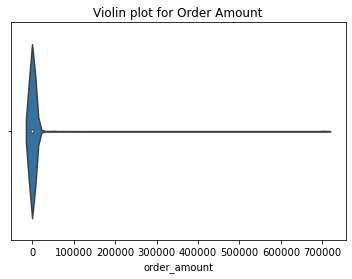

In [20]:
# Distribution of order amount
ax = sns.violinplot(x=df["order_amount"]).set_title('Violin plot for Order Amount')

**Check scenario 1**

In [21]:
# Get price of a shoe for each store
df['price_of_shoe'] = df['order_amount'] / df['total_items']

In [22]:
# max price of shoe
df['price_of_shoe'].max()

25725.0

In [23]:
# get shop_id for stores that sell shoes over $1000
df.query("price_of_shoe > 500")['shop_id'].value_counts()

78    46
Name: shop_id, dtype: int64

<br>

**Check scenario 2**

In [24]:
df.query("total_items > 10")

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_of_shoe
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00,352.0


From our quick investigation, we can say that both scenarios 1 and 2 apply here
1. `shop_id` 78 is the only shopify shoe store to carry an item over the 500 dollar price tag. They carry a shoe with a price tag of 25725 dollars.
2. `user_id` 607 has made numerous purchases of from `shop_id` 42 with 2000 items per order, making it an order value of 704000 dollars. 

<br>

### b) What metric would you report for this dataset?


A better metric to compare shopify wide stores is to use the **median** instead. The median is the middle number in a sorted list, making it more robust to outliers.

<br>

### c) What is its value?

In [25]:
print(f'Median of order value: ${df["order_amount"].median()}')

Median of order value: $284.0


The median of order value of all stores across shopify is 284 dollars. This makes a lot more sense.

<br>
<br>

## Question 2 
For this question you’ll need to use SQL. [Follow this link](https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL) to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.


### a) How many orders were shipped by Speedy Express in total?


```sql 
SELECT count(*) FROM Orders
join Shippers on Orders.ShipperID = Shippers.ShipperID
where ShipperName = 'Speedy Express';

```

Answer: 54 orders were shipped by Speed Express

<br>

### b) What is the last name of the employee with the most orders?


```sql
SELECT Employees.LastName from Orders
join Employees on Employees.EmployeeID = Orders.EmployeeID
GROUP BY Orders.Employeeid
ORDER BY count(*) desc
LIMIT 1;
```
Answer: The last name of the employee with the most orders is Peacock

<br>

### c) What product was ordered the most by customers in Germany?

```sql
select SUM(Quantity) as total_quantity, ProductName from Orders
join Customers on Orders.CustomerID = Customers.CustomerID
join OrderDetails on Orders.OrderID = OrderDetails.OrderID
join Products on OrderDetails.ProductID = Products.ProductID
WHERE Country = 'Germany'
GROUP BY OrderDetails.ProductID
ORDER BY total_quantity desc
LIMIT 1;
```

Answer: The product ordered most by customers in Germany is Boston Crab Meat with a total quantity of 160.